<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 (Problem 1) - Sentiment Analysis Model  (Group)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [85]:
# Import the Required Packages
import re
import tensorflow
import os
import numpy as np
import pandas as pd
from googletrans import Translator
from langdetect import detect
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Flatten
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, BatchNormalization, MaxPooling1D
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras import layers, callbacks, regularizers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import seaborn as sns
from tensorflow.keras import backend as K
import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 1 – Data Loading and Processing (Group)

### 1.1 Data Loading

In [86]:
dat = pd.read_csv('disneyplus_reviews.csv', delimiter=',')
texts = dat.loc[:,'content'].values 
score = dat.loc[:,'score'].values

In [3]:
texts[:20]

array(["It's a very good app PERFECT for family movie nights 🌙👌🏾😊",
       'Disney suck, I’m paying for two whole accounts with Hulu and espn and they won’t let me manage my account but allow a whole other person manage my account',
       'very nice 👍👍👍👍👍 I love it 💕💕💕💕💕', 'MARVEL!', 'rr rock a',
       'very good movie, it teaches that people of different ethnicity can unite for a common cause of helping others and all heroes come in different cultures.',
       'Great Movies and shows', 'ad a zfF ZOFRAN p',
       "It is a good streaming service, it's just when you accidentally press above the screen it goes back. Which is annoying but easy to deal with",
       'streams perfectly!', 'Enjoyed',
       'best shows, best movies, app works great.. excellence',
       "This is amazing on my samsung galaxy A10e. I can watch my favorite disney shows and movie's",
       'App is really bad too many bugs. Log in problems just not worth it. As expected from any Disney product.',
       'Ich 

In [4]:
score[:20]

array([5, 1, 5, 5, 2, 5, 5, 1, 4, 4, 4, 5, 5, 1, 1, 5, 5, 5, 1, 4],
      dtype=int64)

### 1.2 Data Processing


In [5]:
# to clean the text to lower case, remove tag, remove special character and number
def pre_process(text):
    
    text = str(text)
    
    # lowercase
    text=text.lower().strip()
    
    #remove html tags
    text=re.sub("</?.*?>"," <> ",text)
    
    # remove special characters and digits
    text=re.sub("[^A-Za-z]+"," ",text)
    
    return text

dat['content'] = dat['content'].apply(lambda x:pre_process(x))

In [6]:
dat.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,b6a61f47-142a-4fa7-8861-cac7db5395bf,Rylan-Tanya Bailey,https://play-lh.googleusercontent.com/a-/AFdZu...,it s a very good app perfect for family movie ...,5,0,2.9.1-rc1,2022-08-06 10:15:15,NaN,NaN
1,3c703684-6465-42db-b4b2-74465a1e7c9c,Lena Hollins,https://play-lh.googleusercontent.com/a/AItbvm...,disney suck i m paying for two whole accounts ...,1,0,2.3.2-rc1,2022-08-06 10:10:05,NaN,NaN
2,518ca9a9-de68-46c0-820e-89edb759b388,rodelia kitahira,https://play-lh.googleusercontent.com/a-/AFdZu...,very nice i love it,5,0,2.9.1-rc1,2022-08-06 10:01:21,NaN,NaN
3,0c3fceec-a9aa-4781-a81c-c67d6d68ff60,Kirt Klass,https://play-lh.googleusercontent.com/a-/AFdZu...,marvel,5,0,2.9.1-rc1,2022-08-06 09:57:32,NaN,NaN
4,c5517f5c-05f8-4d83-bc46-c38b846cd92d,Raquel Martinez,https://play-lh.googleusercontent.com/a/AItbvm...,rr rock a,2,0,2.9.1-rc1,2022-08-06 09:51:19,NaN,NaN


In [7]:
# Remove row with empty contents (Not english)
dat.replace(' ', np.nan, inplace=True)
dat.dropna(subset=['content'], inplace=True)

In [8]:
def english_identifier(text):
    lang = detect(text)
    if lang == "en":
        text = text
    else:
        text = " "
    return text

dat['content'] = dat['content'].apply(lambda x:english_identifier(x))

In [9]:
# Remove row with empty contents (Not english)
dat.replace(' ', np.nan, inplace=True)
dat.dropna(subset=['content'], inplace=True)

In [10]:
dat.tail(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
180188,72f1adf7-569d-4e04-a206-052f09f62edc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,brings back all my childhood memories from sho...,5,0,1.1.3,2019-11-12 14:54:42,NaN,NaN
180189,8246f9f6-200e-4a4d-bd94-bb7a94bf5f5e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,wow look out netflix disney is coming for you ...,5,0,1.1.3,2019-11-12 14:54:16,NaN,NaN
180190,fa12e8ea-f5b4-4947-a764-d8c7f739c3bb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,easy to use and no bugs so far love it,5,2,1.1.3,2019-11-12 14:53:33,NaN,NaN
180191,955ee495-d1b6-4ccd-89b8-f0cbfda90bdc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,so far it s amazing and totally worth the money,5,0,1.1.3,2019-11-12 14:53:15,NaN,NaN
180194,841da9d6-4731-47a7-bd07-61c11dd16f78,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good content just please bring back kids incor...,4,2,1.1.3,2019-11-12 14:50:30,NaN,NaN
180195,0a0c945b-34cf-42ae-8f84-183d5abd2c8a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,not working at puerto rico,1,0,1.1.3,2019-11-12 14:50:26,"Hi, we apologize for any issue you might be ha...",2019-12-24 01:32:14
180196,19dd7816-08fa-4f54-84e1-71c5bf29c186,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,incredible well done app disney has a winner w...,5,0,1.1.3,2019-11-12 14:47:29,NaN,NaN
180197,1e60fcab-2f4b-401f-84d9-e379ef9f6918,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,so far so good even allows you to download you...,5,0,1.1.3,2019-11-12 14:47:20,NaN,NaN
180198,9ca71b45-5c2c-4954-8286-d6922c763351,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,great start disney,5,0,1.1.3,2019-11-12 14:46:35,NaN,NaN
180199,cef15543-c3df-4888-b273-d593744a6cdf,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,very solid app it flows a lot like netflix,5,0,1.1.3,2019-11-12 14:45:49,NaN,NaN


In [11]:
unique_labels = dat.groupby('score').nunique()
print(unique_labels['content'])

score
1    40897
2    12001
3    11972
4    14142
5    50061
Name: content, dtype: int64


In [12]:
content_list = dat['content'].tolist()

In [13]:
df_1 = dat[dat['score']==1]
df_1.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
1,3c703684-6465-42db-b4b2-74465a1e7c9c,Lena Hollins,https://play-lh.googleusercontent.com/a/AItbvm...,disney suck i m paying for two whole accounts ...,1,0,2.3.2-rc1,2022-08-06 10:10:05,NaN,NaN
13,0a5f18b4-baba-4d6a-b740-aea6b68c9e23,Martin Amador,https://play-lh.googleusercontent.com/a-/AFdZu...,app is really bad too many bugs log in problem...,1,1,NaN,2022-08-06 08:58:24,NaN,NaN
18,94a1a100-0fae-496c-9eae-5343cf97c20b,Mark Brown,https://play-lh.googleusercontent.com/a/AItbvm...,as others have mentioned the app simply doesn ...,1,1,2.9.1-rc1,2022-08-06 08:29:01,NaN,NaN
27,80db9329-4908-44fe-9376-9dccc3d2867a,MICHELLS DIARIES,https://play-lh.googleusercontent.com/a-/AFdZu...,not working have been trying for over a week t...,1,1,2.9.1-rc1,2022-08-06 06:55:58,NaN,NaN
35,bc7b2037-c7d8-462b-8ae2-c87765797f71,Cassie Parke,https://play-lh.googleusercontent.com/a/AItbvm...,the app was working fine until a point when i ...,1,1,2.9.1-rc1,2022-08-06 05:57:08,NaN,NaN


In [14]:
df_2 = dat[dat['score']==2]
df_2.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
33,66c240f1-82bb-4cc0-8399-b4cb442136df,Carlos,https://play-lh.googleusercontent.com/a-/AFdZu...,this pos logs you out then tells me my log in ...,2,1,2.9.1-rc1,2022-08-06 06:31:05,NaN,NaN
34,2876f3da-7e6e-4537-9833-eebf21958a0f,Bob Cain,https://play-lh.googleusercontent.com/a/AItbvm...,it s great when it works i can only get it to ...,2,1,2.9.1-rc1,2022-08-06 06:01:00,NaN,NaN
37,f234fbf6-fd89-490e-b9e0-f9ea96c89ded,Marvin Daniel,https://play-lh.googleusercontent.com/a-/AFdZu...,i want to caniel it pleas dorp it thnak,2,0,2.8.0-rc2,2022-08-06 05:38:22,NaN,NaN
59,5be2964d-9f37-4b72-87bc-fc22daf882f0,Adam Hedges,https://play-lh.googleusercontent.com/a-/AFdZu...,good content but awful application crashes and...,2,0,2.9.1-rc1,2022-08-06 03:06:21,NaN,NaN
66,4d128299-557c-4471-8a0f-5381a7c8f56d,mario armendariz,https://play-lh.googleusercontent.com/a-/AFdZu...,lag with wifi,2,0,2.9.1-rc1,2022-08-06 02:25:11,NaN,NaN


In [15]:
df_3 = dat[dat['score']==3]
df_3.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
20,0a8fe624-c83d-40a3-a37b-28e868196c3e,Rhys Lavy,https://play-lh.googleusercontent.com/a-/AFdZu...,not really the best movies or shows on the app...,3,0,2.9.1-rc1,2022-08-06 07:52:30,NaN,NaN
22,9fe8d68f-212f-4cc0-8544-93e50aa2d78f,Marilyn Looper,https://play-lh.googleusercontent.com/a-/AFdZu...,will not download to tablet or pc only choices...,3,0,NaN,2022-08-06 07:31:49,NaN,NaN
30,987f24d6-266f-482d-9941-f6cf9f272f09,Justin Henry,https://play-lh.googleusercontent.com/a-/AFdZu...,wicked step father abuse slows and is still here,3,0,2.9.1-rc1,2022-08-06 06:46:44,NaN,NaN
89,ae6c82c9-5af7-4691-92f8-1babb1e6319e,Mindi Styn,https://play-lh.googleusercontent.com/a/AItbvm...,i love the disney plus service but the app is ...,3,0,2.9.1-rc1,2022-08-06 00:40:57,NaN,NaN
110,8b191412-6248-44a7-82ce-6ab169de9f6c,Alex,https://play-lh.googleusercontent.com/a/AItbvm...,please make the watchlist bigger now it s limi...,3,0,2.9.1-rc1,2022-08-05 21:45:57,NaN,NaN


In [16]:
df_4 = dat[dat['score']==4]
df_4.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
8,b9d36e18-2dd8-47d5-bfe4-526a8bd86a55,thaddeusc44,https://play-lh.googleusercontent.com/a-/AFdZu...,it is a good streaming service it s just when ...,4,0,2.9.1-rc1,2022-08-06 09:44:23,NaN,NaN
9,6d2d5548-916a-434e-95df-b745f9553620,Cesar Robles,https://play-lh.googleusercontent.com/a-/AFdZu...,streams perfectly,4,0,2.9.1-rc1,2022-08-06 09:43:07,NaN,NaN
19,33c75bab-a145-4dcc-970f-4ba8ddeb1835,Thomas Hatch,https://play-lh.googleusercontent.com/a/AItbvm...,i love it it good when you can watch it entime...,4,0,2.6.2-rc1,2022-08-06 08:11:19,NaN,NaN
24,c69a2d1f-2760-45a3-b088-b121e3761001,Daniel Dias,https://play-lh.googleusercontent.com/a-/AFdZu...,the app is good but there are so many errors c...,4,0,2.9.1-rc1,2022-08-06 07:16:28,NaN,NaN
32,9e355ca9-5f98-424e-9195-5bc2cd929997,Vladan Đuričanin,https://play-lh.googleusercontent.com/a-/AFdZu...,stars just because it doesn t yet have serbia...,4,0,NaN,2022-08-06 06:34:27,NaN,NaN


In [17]:
df_5 = dat[dat['score']==5]
df_5.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,b6a61f47-142a-4fa7-8861-cac7db5395bf,Rylan-Tanya Bailey,https://play-lh.googleusercontent.com/a-/AFdZu...,it s a very good app perfect for family movie ...,5,0,2.9.1-rc1,2022-08-06 10:15:15,NaN,NaN
5,82a8c221-85d9-4fed-9ce0-41609d4fe9e9,ANTHONY COOPER,https://play-lh.googleusercontent.com/a-/AFdZu...,very good movie it teaches that people of diff...,5,0,2.9.1-rc1,2022-08-06 09:47:20,NaN,NaN
6,8cd7f3cd-7784-48ec-82de-e4dcf0bd99ad,Magnus SaucerMan,https://play-lh.googleusercontent.com/a-/AFdZu...,great movies and shows,5,0,2.9.1-rc1,2022-08-06 09:46:24,NaN,NaN
11,65d2a028-90bb-4e23-a03f-56f2aae044f6,David Paul,https://play-lh.googleusercontent.com/a/AItbvm...,best shows best movies app works great excellence,5,0,2.9.1-rc1,2022-08-06 09:15:54,NaN,NaN
12,a02a4a82-e85a-4ccf-ba1b-5085ce511638,Juan Zelaya-Diaz,https://play-lh.googleusercontent.com/a-/AFdZu...,this is amazing on my samsung galaxy a e i can...,5,0,2.9.1-rc1,2022-08-06 09:02:08,NaN,NaN


In [18]:
df1_sampled = df_1.sample(n=10000,random_state = 2).copy()
df1_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15346 to 62888
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8094 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          689 non-null    object
 9   repliedAt             689 non-null    object
dtypes: int64(2), object(8)
memory usage: 859.4+ KB


In [19]:
df2_sampled = df_2.sample(n=10000,random_state = 2).copy()
df2_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 141959 to 35727
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8672 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          286 non-null    object
 9   repliedAt             286 non-null    object
dtypes: int64(2), object(8)
memory usage: 859.4+ KB


In [20]:
df3_sampled = df_3.sample(n=10000,random_state = 2).copy()
df3_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 146377 to 125651
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8832 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          245 non-null    object
 9   repliedAt             245 non-null    object
dtypes: int64(2), object(8)
memory usage: 859.4+ KB


In [21]:
df4_sampled = df_4.sample(n=10000,random_state = 2).copy()
df4_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 154973 to 154258
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8795 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          147 non-null    object
 9   repliedAt             147 non-null    object
dtypes: int64(2), object(8)
memory usage: 859.4+ KB


In [22]:
df5_sampled = df_5.sample(n=10000,random_state = 2).copy()
df5_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14406 to 130055
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8314 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          33 non-null     object
 9   repliedAt             33 non-null     object
dtypes: int64(2), object(8)
memory usage: 859.4+ KB


In [23]:
#Create a dataframe that concatenates df0_sampled (not promoted) and df1(promoted employees)
df_new = pd.concat([df1_sampled, df2_sampled, df3_sampled, df4_sampled, df5_sampled], axis=0)
df_new['score'].value_counts()

1    10000
2    10000
3    10000
4    10000
5    10000
Name: score, dtype: int64

In [24]:
df_new.to_csv('filtered_downsampled_disneyplus_reviews.csv', index=False)

In [6]:
df = pd.read_csv('filtered_downsampled_disneyplus_reviews.csv')

In [7]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,b845ac60-6fa2-492c-bc35-492bcb2289a7,Mikaylah McLaughlin,https://play-lh.googleusercontent.com/a-/AFdZu...,app uses alot more data than other streaming s...,1,1,2.5.0-rc1,2022-03-16 05:55:23,NaN,NaN
1,697f7b0f-7c06-4ea1-abea-4180e2172c76,Melissa Hayes,https://play-lh.googleusercontent.com/a-/AFdZu...,okay the app is fine but i don t like huge cor...,1,0,1.9.1,2020-09-20 12:59:07,NaN,NaN
2,53a89eb3-1233-4c23-ac8b-69ab98185762,Bluu Johnson,https://play-lh.googleusercontent.com/a-/AFdZu...,the app wont let me log in it keeps saying i n...,1,0,1.11.3,2020-12-16 03:49:01,NaN,NaN
3,95e5f052-d662-44ad-aef9-8093aa427aa9,Andreea N,https://play-lh.googleusercontent.com/a-/AFdZu...,the app just doesn t load anymore i can t do a...,1,0,1.8.0,2020-09-03 04:40:39,NaN,NaN
4,b1c1f991-388d-4284-b1e6-9c02208b2e35,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,i can t even log in i paid for service too not...,1,0,1.1.3,2019-11-15 03:28:33,NaN,NaN


In [8]:
df = df[["content", "score"]]

In [9]:
df.head()

,content,score
0,app uses alot more data than other streaming s...,1
1,okay the app is fine but i don t like huge cor...,1
2,the app wont let me log in it keeps saying i n...,1
3,the app just doesn t load anymore i can t do a...,1
4,i can t even log in i paid for service too not...,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  50000 non-null  object
 1   score    50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


### 1.3 Data Sampling

In [11]:
text = df.loc[:,'content'].values
labels = df.loc[:,'score'].values
texts_cleaned = []
for i in text:
    texts_cleaned.append(str(i))

In [12]:
texts_cleaned

['app uses alot more data than other streaming services and after last update doesn t allow for casting ',
 'okay the app is fine but i don t like huge corporations so i m voicing my opinion with this dumb review that nobody cares about ',
 'the app wont let me log in it keeps saying i need to update payment but i already paid for the bundle subscription ',
 'the app just doesn t load anymore i can t do anything ',
 'i can t even log in i paid for service too not a trial this app sucks ',
 'hasnt worked in days',
 'horrible streaming performance and service total waste of money the disney content delivery system clearly doesn t work it s just constant pause buffer play pause buffer play netflix hulu youtube all work great but disney application is a complete joke shows are just ok mandalorian is the only new thing that is any good but none of that matters because the app doesn t work i don t really see this business model working out since you can watch the entire library in a few days

In [13]:
score_list = []

for i in labels:
    i -= 1
    score_list.append(i)
        
score = np.array(score_list)

In [14]:
max_len = -1
stop_words = set(stopwords.words('english'))
tkList = []
filtered_sentence = []
for example in texts_cleaned:
    if len(example) > max_len:
        max_len = len(example)
        print('the maximum length of the text inputs is ', max_len)
        max_features = 15000

for s in texts_cleaned:
    tkList.append(nltk.word_tokenize(s))

for i in tkList:
    filtered_sentence.append([w for w in i if not w.lower() in stop_words])

filtered_list = [' '.join(x) for x in filtered_sentence]

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts_cleaned)
sequences = tokenizer.texts_to_sequences(filtered_list)

word_index = tokenizer.word_index
reviews = pad_sequences(sequences, maxlen=50) #150

#labels = [0,1,2,3,4]
y = to_categorical(np.asarray(score))
print('Shape of data tensor:', reviews.shape)
print('Shape of label tensor:', y.shape)

the maximum length of the text inputs is  102
the maximum length of the text inputs is  128
the maximum length of the text inputs is  480
the maximum length of the text inputs is  488
the maximum length of the text inputs is  498
the maximum length of the text inputs is  781
the maximum length of the text inputs is  1131
the maximum length of the text inputs is  1580
the maximum length of the text inputs is  2652
Shape of data tensor: (50000, 50)
Shape of label tensor: (50000, 5)


In [15]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reviews, y, test_size=0.2)

## Step 2 – Develop a Sentiment Analysis Model (Individual: One Model Per Student)

### Model #1 SimpleRNN (Name: Dex Ngiam Chao Yi)

In [36]:
# Build the Model
modelSIMPLE8 = Sequential()
modelSIMPLE8.add(Embedding(max_features, 16, input_length=50))
modelSIMPLE8.add(SimpleRNN(32, return_sequences=True))
modelSIMPLE8.add(Dropout(0.8))
modelSIMPLE8.add(SimpleRNN(32))
modelSIMPLE8.add(Dropout(0.4))
modelSIMPLE8.add(Dense(5, activation='softmax'))

modelSIMPLE8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            240000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 50, 32)            1568      
                                                                 
 dropout (Dropout)           (None, 50, 32)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 243,813
Trainable params: 243,813
Non-trai

In [38]:
# Train the Model

modelSIMPLE8.compile(optimizer=optimizers.RMSprop(learning_rate =0.0001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

history = modelSIMPLE8.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
1000/1000 [==============================] - 91s 89ms/step - loss: 1.6441 - acc: 0.2539 - val_loss: 1.5146 - val_acc: 0.3041
Epoch 2/20
1000/1000 [==============================] - 92s 92ms/step - loss: 1.5251 - acc: 0.3067 - val_loss: 1.4024 - val_acc: 0.3532
Epoch 3/20
1000/1000 [==============================] - 94s 94ms/step - loss: 1.4280 - acc: 0.3464 - val_loss: 1.3394 - val_acc: 0.3740
Epoch 4/20
1000/1000 [==============================] - 97s 97ms/step - loss: 1.3685 - acc: 0.3723 - val_loss: 1.3037 - val_acc: 0.4027
Epoch 5/20
1000/1000 [==============================] - 96s 96ms/step - loss: 1.3219 - acc: 0.3960 - val_loss: 1.2608 - val_acc: 0.4333
Epoch 6/20
1000/1000 [==============================] - 98s 98ms/step - loss: 1.2880 - acc: 0.4178 - val_loss: 1.2387 - val_acc: 0.4506
Epoch 7/20
1000/1000 [==============================] - 96s 96ms/step - loss: 1.2647 - acc: 0.4322 - val_loss: 1.2235 - val_acc: 0.4646
Epoch 8/20
1000/1000 [==========================

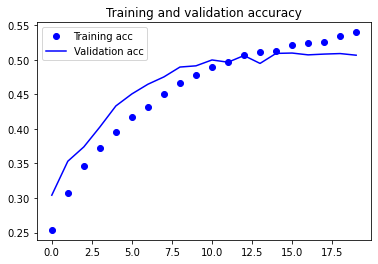

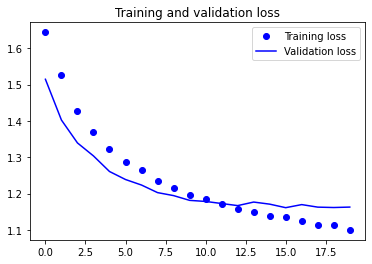

In [39]:
# Train the Model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
modelSIMPLE8.save('DL_Group_SimpleRNN.h5')

### Model #2 LSTM (Name: Owg Jun Xian)

In [42]:
# Build the Model
lstmmodel10 = Sequential()
lstmmodel10.add(Embedding(max_features, 16, input_length=50))
lstmmodel10.add(LSTM(64, return_sequences=True))
lstmmodel10.add(Dropout(0.5))
lstmmodel10.add(LSTM(64,kernel_regularizer=regularizers.l1(0.002)))
lstmmodel10.add(Dropout(0.5))
lstmmodel10.add(Dense(5, activation='softmax'))
lstmmodel10.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            240000    
                                                                 
 lstm (LSTM)                 (None, 50, 64)            20736     
                                                                 
 dropout_2 (Dropout)         (None, 50, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 294,085
Trainable params: 294,085
Non-tr

In [44]:
optimizer = optimizers.RMSprop(0.0001)
lstmmodel10.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

history =lstmmodel10.fit(X_train, y_train,epochs=20,batch_size=32,
                    validation_split=0.2)

Epoch 1/20
1000/1000 [==============================] - 20s 15ms/step - loss: 2.5934 - acc: 0.2657 - val_loss: 1.7615 - val_acc: 0.3121
Epoch 2/20
1000/1000 [==============================] - 15s 15ms/step - loss: 1.5868 - acc: 0.3168 - val_loss: 1.4945 - val_acc: 0.3551
Epoch 3/20
1000/1000 [==============================] - 15s 15ms/step - loss: 1.4702 - acc: 0.3427 - val_loss: 1.4280 - val_acc: 0.3787
Epoch 4/20
1000/1000 [==============================] - 15s 15ms/step - loss: 1.4155 - acc: 0.3675 - val_loss: 1.3807 - val_acc: 0.3806
Epoch 5/20
1000/1000 [==============================] - 15s 15ms/step - loss: 1.3775 - acc: 0.3826 - val_loss: 1.3566 - val_acc: 0.3926
Epoch 6/20
1000/1000 [==============================] - 15s 15ms/step - loss: 1.3490 - acc: 0.3923 - val_loss: 1.3288 - val_acc: 0.4087
Epoch 7/20
1000/1000 [==============================] - 15s 15ms/step - loss: 1.3226 - acc: 0.4121 - val_loss: 1.3017 - val_acc: 0.4260
Epoch 8/20
1000/1000 [==========================

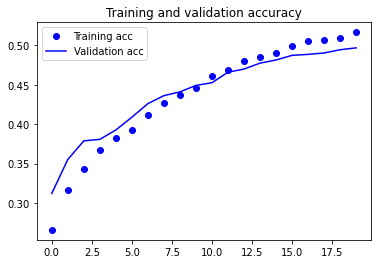

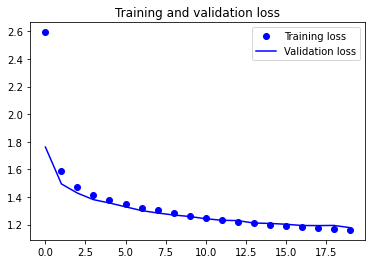

In [45]:
# Train the Model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
lstmmodel10.save('DL_Group_LSTM.h5')

### Model #3 GLoVE GRU (Name: Lu Junji)

In [15]:
maxlen = 50
max_features = 15000

In [16]:
glove_dir = 'C:\\Users\\shiny\\Desktop\\DL\\ASG2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.50d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [17]:
embedding_dim = 50

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_features:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [18]:
# Build the Model
modelGRU12 = Sequential()
modelGRU12.add(Embedding(max_features, embedding_dim, input_length=maxlen))
modelGRU12.add(GRU(64,return_sequences=True))
modelGRU12.add(Dropout(0.6))
modelGRU12.add(GRU(32,dropout=0.8,recurrent_dropout=0.5))
#modelGRU8.add(Dropout(0.6))
modelGRU12.add(Dense(5, activation='softmax'))
#Load the GloVe embeddings in the model              
modelGRU12.layers[0].set_weights([embedding_matrix])
modelGRU12.layers[0].trainable = True
modelGRU12.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            750000    
                                                                 
 gru (GRU)                   (None, 50, 64)            22272     
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 781,845
Trainable params: 781,845
Non-trainable params: 0
_________________________________________________________________


In [19]:
modelGRU12.compile(loss='categorical_crossentropy', 
              optimizer=tensorflow.keras.optimizers.RMSprop(0.0001), metrics =['acc'])
history = modelGRU12.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
1000/1000 [==============================] - 164s 156ms/step - loss: 1.5977 - acc: 0.2555 - val_loss: 1.4347 - val_acc: 0.3485
Epoch 2/20
1000/1000 [==============================] - 166s 166ms/step - loss: 1.4448 - acc: 0.3443 - val_loss: 1.3723 - val_acc: 0.3717
Epoch 3/20
1000/1000 [==============================] - 175s 176ms/step - loss: 1.3815 - acc: 0.3690 - val_loss: 1.3384 - val_acc: 0.3995
Epoch 4/20
1000/1000 [==============================] - 174s 175ms/step - loss: 1.3397 - acc: 0.3955 - val_loss: 1.2892 - val_acc: 0.4327
Epoch 5/20
1000/1000 [==============================] - 171s 171ms/step - loss: 1.3036 - acc: 0.4198 - val_loss: 1.2663 - val_acc: 0.4495
Epoch 6/20
1000/1000 [==============================] - 167s 167ms/step - loss: 1.2761 - acc: 0.4388 - val_loss: 1.2469 - val_acc: 0.4647
Epoch 7/20
1000/1000 [==============================] - 161s 161ms/step - loss: 1.2594 - acc: 0.4439 - val_loss: 1.2417 - val_acc: 0.4691
Epoch 8/20
1000/1000 [============

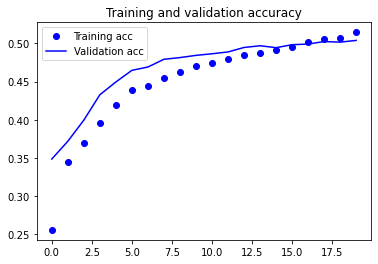

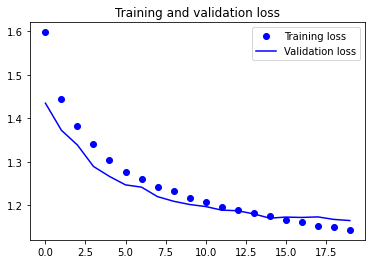

In [20]:
# Train the Model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
modelGRU12.save('DL_Group_GloVeGRU.h5')

### Model #4 GloVe Bidirectional LSTM+GRU (Name: Seo Shin Youn)

In [13]:
maxlen = 50
max_features = 15000

In [14]:
glove_dir = 'C:\\Users\\shiny\\Desktop\\DL\\ASG2'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.50d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [15]:
embedding_dim = 50

embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_features:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [64]:
modelBidirectionalLSTMGRU10 = Sequential()
modelBidirectionalLSTMGRU10.add(Embedding(max_features, embedding_dim, input_length=50))
modelBidirectionalLSTMGRU10.add(Bidirectional(layers.LSTM(128, return_sequences=True)))
modelBidirectionalLSTMGRU10.add(layers.Dropout(0.6))
modelBidirectionalLSTMGRU10.add(Bidirectional(layers.LSTM(128, return_sequences=True,
                                                        kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.005))))
modelBidirectionalLSTMGRU10.add(layers.Dropout(0.6))
modelBidirectionalLSTMGRU10.add(Bidirectional(layers.LSTM(64, return_sequences=True, 
                                                         kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.005))))
modelBidirectionalLSTMGRU10.add(layers.Dropout(0.6))
modelBidirectionalLSTMGRU10.add(Bidirectional(layers.GRU(128, return_sequences=True)))
modelBidirectionalLSTMGRU10.add(layers.Dropout(0.6))
modelBidirectionalLSTMGRU10.add(Bidirectional(layers.GRU(128, return_sequences=True,
                                                       kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.005))))
modelBidirectionalLSTMGRU10.add(layers.Dropout(0.6))
modelBidirectionalLSTMGRU10.add(Bidirectional(layers.GRU(64, return_sequences=False, 
                                                         kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.005))))
modelBidirectionalLSTMGRU10.add(layers.Dropout(0.6))
modelBidirectionalLSTMGRU10.add(Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
modelBidirectionalLSTMGRU10.add(layers.Dropout(0.4))
modelBidirectionalLSTMGRU10.add(Dense(5, activation='softmax', kernel_regularizer = regularizers.l2(0.01)))
modelBidirectionalLSTMGRU10.layers[0].set_weights([embedding_matrix])
modelBidirectionalLSTMGRU10.layers[0].trainable = True
optimizer = optimizers.Adam(learning_rate = 0.00002)
modelBidirectionalLSTMGRU10.compile(loss='categorical_crossentropy',
              optimizer=optimizer, metrics =['acc'])

modelBidirectionalLSTMGRU10.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 50, 50)            750000    
                                                                 
 bidirectional_42 (Bidirecti  (None, 50, 256)          183296    
 onal)                                                           
                                                                 
 dropout_50 (Dropout)        (None, 50, 256)           0         
                                                                 
 bidirectional_43 (Bidirecti  (None, 50, 256)          394240    
 onal)                                                           
                                                                 
 dropout_51 (Dropout)        (None, 50, 256)           0         
                                                                 
 bidirectional_44 (Bidirecti  (None, 50, 128)         

In [65]:
# Train the Model
earlystopping = callbacks.EarlyStopping(monitor='val_acc', mode='max', patience = 10)
history = modelBidirectionalLSTMGRU10.fit(X_train, y_train,
          batch_size=64,
          epochs=50,
          validation_split=0.2,
          callbacks=[earlystopping])

Epoch 1/50
500/500 [==============================] - 67s 95ms/step - loss: 317.8714 - acc: 0.2268 - val_loss: 284.3156 - val_acc: 0.3022
Epoch 2/50
500/500 [==============================] - 44s 88ms/step - loss: 253.5231 - acc: 0.2841 - val_loss: 223.8702 - val_acc: 0.3261
Epoch 3/50
500/500 [==============================] - 47s 95ms/step - loss: 196.8645 - acc: 0.3319 - val_loss: 171.0266 - val_acc: 0.3543
Epoch 4/50
500/500 [==============================] - 49s 98ms/step - loss: 147.8899 - acc: 0.3554 - val_loss: 125.8372 - val_acc: 0.3753
Epoch 5/50
500/500 [==============================] - 48s 97ms/step - loss: 106.3912 - acc: 0.3696 - val_loss: 88.0201 - val_acc: 0.3871
Epoch 6/50
500/500 [==============================] - 50s 100ms/step - loss: 72.1964 - acc: 0.3799 - val_loss: 57.4454 - val_acc: 0.3921
Epoch 7/50
500/500 [==============================] - 51s 103ms/step - loss: 45.1780 - acc: 0.3862 - val_loss: 33.9994 - val_acc: 0.4064
Epoch 8/50
500/500 [=================

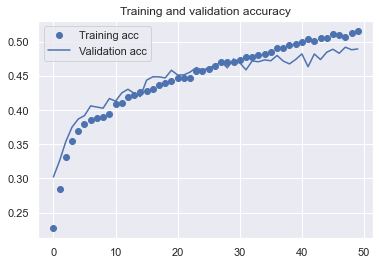

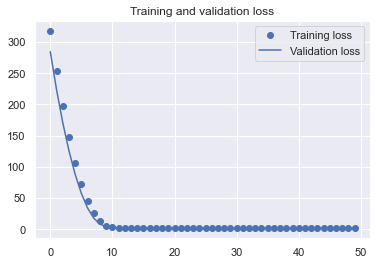

In [66]:
# Train the Model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [67]:
modelBidirectionalLSTMGRU10.save('DL_Group_GloVeBidirectionalLSTMGRU.h5')

### Model #5  (Name: Sean Tan Yi Xun)

In [16]:
# Build the Model
modelConv1D_2 = Sequential()
modelConv1D_2.add(Embedding(max_features, embedding_dim, input_length=maxlen))
modelConv1D_2.add(Conv1D(32, 5, kernel_regularizer=l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=l2(2e-3)))
modelConv1D_2.add(BatchNormalization())
modelConv1D_2.add(MaxPooling1D(pool_size=2))
modelConv1D_2.add(Flatten())
modelConv1D_2.add(Dense(32))
modelConv1D_2.add(Dropout(0.4))
modelConv1D_2.add(Dense(5, activation='softmax',kernel_regularizer=l1_l2(l1=2e-3, l2=2e-3), bias_regularizer=l2(2e-3)))
modelConv1D_2.layers[0].set_weights([embedding_matrix])
modelConv1D_2.layers[0].trainable = True
modelConv1D_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            750000    
                                                                 
 conv1d (Conv1D)             (None, 46, 32)            8032      
                                                                 
 batch_normalization (BatchN  (None, 46, 32)           128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 23, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 736)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [ ]:
# Train the Model
es = EarlyStopping(monitor='val_acc', mode='max', patience=10)

def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
         return lr *math.exp(-0.05)
lr_cb = LearningRateScheduler(lr_scheduler)

modelConv1D_2.compile(loss='categorical_crossentropy', 
              optimizer=tensorflow.keras.optimizers.RMSprop(0.01), metrics =['acc'])

history = modelConv1D_2.fit(X_train, y_train,
                    epochs=100,
                    batch_size=256,
                    validation_split=0.2,
                    callbacks=[lr_cb, es])

Epoch 1/100


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores


In [ ]:
# Save the Model
model.save('text_model_2.h5')

## Step 3 – Evaluate the Model using Testing Data (Individual & Group)

### SimpleRNN

In [16]:
# Model #1 (replicate where necessary for other models)
dl_group_SimpleRNN = keras.models.load_model('DL_Group_SimpleRNN.h5')

In [17]:
dl_group_SimpleRNN_score = dl_group_SimpleRNN.evaluate(X_test, y_test, verbose=False) 
print('Test loss: ', dl_group_SimpleRNN_score[0])    #Loss on test
print('Test accuracy: ', dl_group_SimpleRNN_score[1])

Test loss:  1.090041160583496
Test accuracy:  0.5454000234603882


In [18]:
# get y_pred
y_pred = dl_group_SimpleRNN.predict(X_test)

313/313 [==============================] - 5s 17ms/step


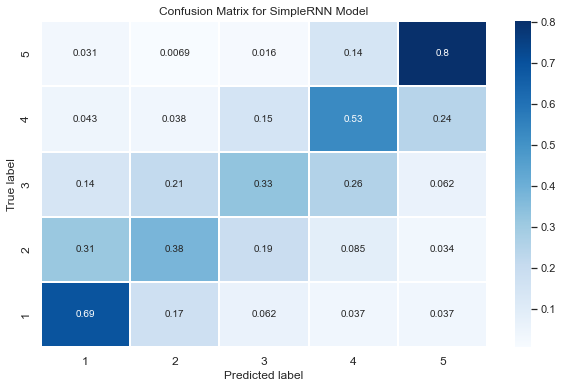

In [19]:
# Get and reshape confusion matrix data
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#build plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
ax = sns.heatmap(cm, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)
ax.set_ylim(0,5)

#add in lane;s
rating = list(np.unique(labels))
tick_marksX = np.arange(len(rating))
tick_marksY = tick_marksX + 0.5
plt.xticks(tick_marksX+0.5, rating,fontsize= 12)
plt.yticks(tick_marksY, rating,fontsize= 12)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SimpleRNN Model')
plt.show()

In [20]:
from sklearn.metrics import classification_report
print("Classification Report=============================================")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

Classification Report=============================================
              precision    recall  f1-score   support

           0       0.57      0.69      0.62      2000
           1       0.47      0.38      0.42      2021
           2       0.43      0.33      0.37      1967
           3       0.50      0.53      0.51      1987
           4       0.68      0.80      0.74      2025

    accuracy                           0.55     10000
   macro avg       0.53      0.54      0.53     10000
weighted avg       0.53      0.55      0.53     10000



### LSTM

In [21]:
# Model #2 (replicate where necessary for other models)
dl_group_LSTM = keras.models.load_model('DL_Group_LSTM.h5')

In [22]:
dl_group_LSTM_score = dl_group_LSTM.evaluate(X_test, y_test, verbose=False) 
print('Test loss: ', dl_group_LSTM_score[0])    #Loss on test
print('Test accuracy: ', dl_group_LSTM_score[1])

Test loss:  1.146640658378601
Test accuracy:  0.5198000073432922


In [23]:
# get y_pred
y_pred = dl_group_LSTM.predict(X_test)

313/313 [==============================] - 2s 5ms/step


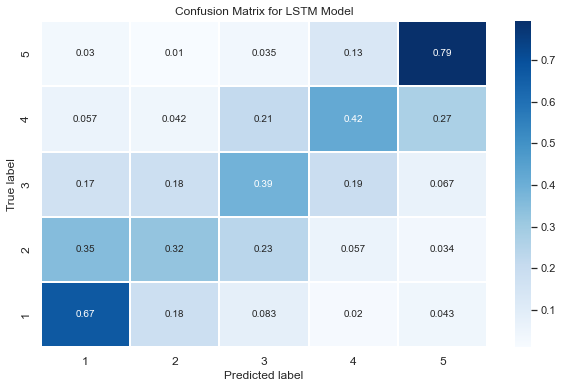

In [24]:
# Get and reshape confusion matrix data
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#build plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
ax = sns.heatmap(cm, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)
ax.set_ylim(0,5)

#add in lane;s
rating = list(np.unique(labels))
tick_marksX = np.arange(len(rating))
tick_marksY = tick_marksX + 0.5
plt.xticks(tick_marksX+0.5, rating,fontsize= 12)
plt.yticks(tick_marksY, rating,fontsize= 12)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for LSTM Model')
plt.show()

In [25]:
from sklearn.metrics import classification_report
print("Classification Report=============================================")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

Classification Report=============================================
              precision    recall  f1-score   support

           0       0.52      0.67      0.59      2000
           1       0.44      0.32      0.37      2021
           2       0.40      0.39      0.40      1967
           3       0.51      0.42      0.46      1987
           4       0.66      0.79      0.72      2025

    accuracy                           0.52     10000
   macro avg       0.51      0.52      0.51     10000
weighted avg       0.51      0.52      0.51     10000



### GloVe Embedded GRU

In [26]:
# Model #3 (replicate where necessary for other models)
dl_group_GloVeGRU = keras.models.load_model('DL_Group_GloVeGRU.h5')

In [27]:
dl_group_GloVeGRU_score = dl_group_GloVeGRU.evaluate(X_test, y_test, verbose=False) 
print('Test loss: ', dl_group_GloVeGRU_score[0])    #Loss on test
print('Test accuracy: ', dl_group_GloVeGRU_score[1])

Test loss:  1.1453715562820435
Test accuracy:  0.5151000022888184


In [28]:
# get y_pred
y_pred = dl_group_GloVeGRU.predict(X_test)

313/313 [==============================] - 11s 32ms/step


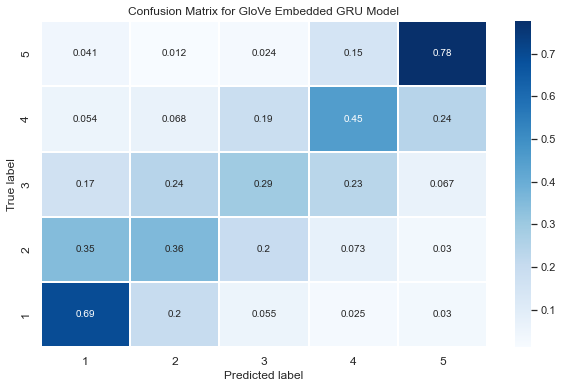

In [29]:
# Get and reshape confusion matrix data
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#build plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
ax = sns.heatmap(cm, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)
ax.set_ylim(0,5)

#add in lane;s
rating = list(np.unique(labels))
tick_marksX = np.arange(len(rating))
tick_marksY = tick_marksX + 0.5
plt.xticks(tick_marksX+0.5, rating,fontsize= 12)
plt.yticks(tick_marksY, rating,fontsize= 12)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for GloVe Embedded GRU Model')
plt.show()

In [30]:
from sklearn.metrics import classification_report
print("Classification Report=============================================")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

Classification Report=============================================
              precision    recall  f1-score   support

           0       0.53      0.69      0.60      2000
           1       0.41      0.36      0.38      2021
           2       0.38      0.29      0.33      1967
           3       0.48      0.45      0.47      1987
           4       0.68      0.78      0.73      2025

    accuracy                           0.52     10000
   macro avg       0.50      0.51      0.50     10000
weighted avg       0.50      0.52      0.50     10000



### GloVe Embedded Bidirectional LSTM + GRU

In [31]:
# Model #4 (replicate where necessary for other models)
dl_group_GloVeBidirectionalLSTMGRU = keras.models.load_model('DL_Group_GloVeBidirectionalLSTMGRU.h5')

In [32]:
dl_group_GloVeBidirectionalLSTMGRU_score = dl_group_GloVeBidirectionalLSTMGRU.evaluate(X_test, y_test, verbose=False) 
print('Test loss: ', dl_group_GloVeBidirectionalLSTMGRU_score[0])    #Loss on test
print('Test accuracy: ', dl_group_GloVeBidirectionalLSTMGRU_score[1])

Test loss:  1.2292753458023071
Test accuracy:  0.5212000012397766


In [33]:
# get y_pred
y_pred = dl_group_GloVeBidirectionalLSTMGRU.predict(X_test)

313/313 [==============================] - 13s 27ms/step


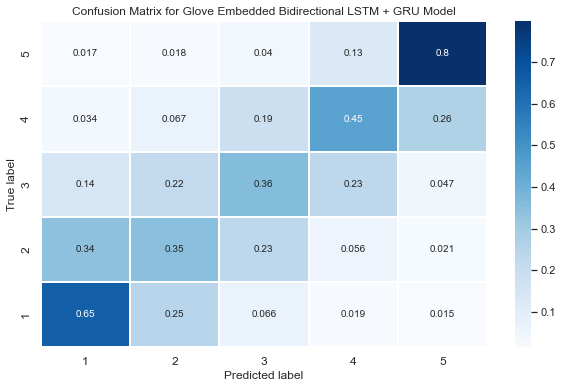

In [34]:
# Get and reshape confusion matrix data
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#build plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
ax = sns.heatmap(cm, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)
ax.set_ylim(0,5)

#add in lane;s
rating = list(np.unique(labels))
tick_marksX = np.arange(len(rating))
tick_marksY = tick_marksX + 0.5
plt.xticks(tick_marksX+0.5, rating,fontsize= 12)
plt.yticks(tick_marksY, rating,fontsize= 12)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Glove Embedded Bidirectional LSTM + GRU Model')
plt.show()

In [35]:
from sklearn.metrics import classification_report
print("Classification Report=============================================")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

Classification Report=============================================
              precision    recall  f1-score   support

           0       0.55      0.65      0.60      2000
           1       0.39      0.35      0.37      2021
           2       0.40      0.36      0.38      1967
           3       0.51      0.45      0.47      1987
           4       0.70      0.80      0.75      2025

    accuracy                           0.52     10000
   macro avg       0.51      0.52      0.51     10000
weighted avg       0.51      0.52      0.51     10000



### Sean's

In [ ]:
# Model #5 (replicate where necessary for other models)
model5 = keras.models.load_model('text_model_5.h5')

### Best Model

In [112]:
# Save the Best Model
dl_group_SimpleRNN.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction (Group)

In [113]:
best_model_simpleRNN.load_weights('text_model_best.h5')

In [117]:
def prediction(best_model_input, review_input, items_l):
    sequences = tokenizer.texts_to_sequences(review_input)
    data = pad_sequences(sequences, maxlen=50)
    prob = best_model_input.predict(data)
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

labels = [1,2,3,4,5]
data = {'label': [0,1,2,3,4,5]}
cat = pd.DataFrame(data)
cat

,label
0,0
1,1
2,2
3,3
4,4
5,5


### 1-Star Review

In [118]:
# takes the user input
text_input1 = np.array([input().lower()])

worst lag error message internet issue


In [119]:
# convert the user input into numeric tensor
#Negative review
prob_df, result = prediction(best_model_simpleRNN,text_input1,np.unique(score))
print('User input: ', text_input1[0])
print('The prediction is: ', result, '\n\n', prob_df.to_string(index=False))

1/1 [==============================] - 0s 42ms/step
User input:  worst lag error message internet issue
The prediction is:  1 

        1        2        3        4        5
0.762944 0.187669 0.041668 0.005146 0.002573


### 2-Star Review

In [130]:
text_input2 = np.array([input().lower()])

app is extremely buggy and crashes when downloading


In [131]:
# convert the user input into numeric tensor
#Negative review
prob_df, result = prediction(best_model_simpleRNN,text_input2,np.unique(score))
print('User input: ', text_input2[0])
print('The prediction is: ', result, '\n\n', prob_df.to_string(index=False))

1/1 [==============================] - 0s 32ms/step
User input:  app is extremely buggy and crashes when downloading
The prediction is:  2 

        1        2        3        4        5
0.365004 0.425871 0.184547 0.023014 0.001564


### 3-Star Review

In [140]:
text_input3 = np.array([input().lower()])

average okay shows with error appearing


In [148]:
# convert the user input into numeric tensor
#Negative review
prob_df, result = prediction(best_model_simpleRNN,text_input3,np.unique(score))
print('User input: ', text_input3[0])
print('The prediction is: ', result, '\n\n', prob_df.to_string(index=False))

1/1 [==============================] - 0s 50ms/step
User input:  average okay shows with error appearing
The prediction is:  3 

        1        2        3        4       5
0.158057 0.303412 0.366222 0.154989 0.01732


### 4-Star Review

In [142]:
text_input4 = np.array([input().lower()])

okay average shows


In [147]:
# convert the user input into numeric tensor
#Negative review
prob_df, result = prediction(best_model_simpleRNN,text_input4,np.unique(score))
print('User input: ', text_input4[0])
print('The prediction is: ', result, '\n\n', prob_df.to_string(index=False))

1/1 [==============================] - 0s 35ms/step
User input:  okay average shows
The prediction is:  4 

        1        2        3        4        5
0.120729 0.161867 0.266195 0.327466 0.123742


### 5-Star Review

In [144]:
text_input5 = np.array([input().lower()])

very good excellent childhood shows


In [146]:
# convert the user input into numeric tensor
#Negative review
prob_df, result = prediction(best_model_simpleRNN,text_input5,np.unique(score))
print('User input: ', text_input5[0])
print('The prediction is: ', result, '\n\n', prob_df.to_string(index=False))

1/1 [==============================] - 0s 38ms/step
User input:  very good excellent childhood shows
The prediction is:  5 

        1        2        3        4        5
0.001159 0.001977 0.011723 0.160266 0.824875


### THE END 